In [1]:
%load_ext kedro.ipython

[12/08/24 22:47:19] INFO     Using                                                                  ]8;id=756358;file://C:\Users\radix\OneDrive\Escritorio\ET\.venv\Lib\site-packages\kedro\framework\project\__init__.py\__init__.py]8;;\:]8;id=765094;file://C:\Users\radix\OneDrive\Escritorio\ET\.venv\Lib\site-packages\kedro\framework\project\__init__.py#270\270]8;;\
                             'C:\Users\radix\OneDrive\Escritorio\ET\.venv\Lib\site-packages\kedro\f                
                             ramework\project\rich_logging.yml' as logging configuration.                          

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=983241;file://C:\Users\radix\OneDrive\Escritorio\ET\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=908964;file://C:\Users\radix\OneDrive\Escritorio\ET\.venv\Lib\site-packages\kedro\ipython\__init__.py#61\61]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=195577;file://C:\Users\radix\OneDrive\Escritorio\ET\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=335402;file://C:\Users\radix\OneDrive\Escritorio\ET\.venv\Lib\site-packages\kedro\ipython\__init__.py#63\63]8;;\

                    INFO     Resolved project path as:                                              ]8;id=827289;file://C:\Users\radix\OneDrive\Escritorio\ET\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=939665;file://C:\Users\radix\OneDrive\Escritorio\ET\.venv\Lib\site-packages\kedro\ipython\__init__.py#178\178]8;;\
                             C:\Users\radix\OneDrive\Escritorio\ET\monopoly.                                       
                             To set a different path, run '%reload_kedro <project_root>'                           

[12/08/24 22:47:27] WARNING  C:\Users\radix\OneDrive\Escritorio\ET\.venv\Lib\site-packages\kedro\fr ]8;id=716907;file://C:\Users\radix\AppData\Local\Programs\Python\Python311\Lib\warnings.py\warnings.py]8;;\:]8;id=681391;file://C:\Users\radix\AppData\Local\Programs\Python\Python311\Lib\warnings.py#109\109]8;;\
                             amework\project\__init__.py:450: UserWarning: An error occurred while                 
                             importing the 'monopoly.pipelines.data_test' module. Nothing defined                  
                             therein will be returned by 'find_pipelines'.                                         
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "C:\Users\radix\OneDrive\Escritorio\ET\.venv\Lib\site-packages\kedro\f                
                             ramework\project\__init__.py", line 442, in find_pipelines                            
                                 pipeline_module = importlib.import_module(pipeline_module_name)                   
                                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^                   
                               File                                                                                
                             "C:\Users\radix\AppData\Local\Programs\Python\Python311\Lib\importlib\                
                             __init__.py", line 126, in import_module                                              
                                 return _bootstrap._gcd_import(name[level:], package, level)                       
                                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^                       
                               File "<frozen importlib._bootstrap>", line 1204, in _gcd_import                     
                               File "<frozen importlib._bootstrap>", line 1176, in _find_and_load                  
                               File "<frozen importlib._bootstrap>", line 1147, in                                 
                             _find_and_load_unlocked                                                               
                               File "<frozen importlib._bootstrap>", line 690, in _load_unlocked                   
                               File "<frozen importlib._bootstrap_external>", line 940, in                         
                             exec_module                                                                           
                               File "<frozen importlib._bootstrap>", line 241, in                                  
                             _call_with_frames_removed                                                             
                               File                                                                                
                             "C:\Users\radix\OneDrive\Escritorio\ET\monopoly\src\monopoly\pipelines                
                             \data_test\__init__.py", line 6, in <module>                                          
                                 from .pipeline import create_pipeline                                             
                               File                                                                                
                             "C:\Users\radix\OneDrive\Escritorio\ET\monopoly\src\monopoly\pipelines                
                             \data_test\pipeline.py", line 2, in <module>                                          
                                 from .nodes import generar_datos_prueba            

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=463958;file://C:\Users\radix\OneDrive\Escritorio\ET\.venv\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=786638;file://C:\Users\radix\OneDrive\Escritorio\ET\.venv\Lib\site-packages\kedro_telemetry\plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[12/08/24 22:47:28] INFO     Kedro project Monopoly                                                 ]8;id=629260;file://C:\Users\radix\OneDrive\Escritorio\ET\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=909836;file://C:\Users\radix\OneDrive\Escritorio\ET\.venv\Lib\site-packages\kedro\ipython\__init__.py#144\144]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=968282;file://C:\Users\radix\OneDrive\Escritorio\ET\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=474130;file://C:\Users\radix\OneDrive\Escritorio\ET\.venv\Lib\site-packages\kedro\ipython\__init__.py#145\145]8;;\
                             'pipelines'                                                                           

[12/08/24 22:47:29] INFO     Registered line magic 'run_viz'                                        ]8;id=565496;file://C:\Users\radix\OneDrive\Escritorio\ET\.venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=767390;file://C:\Users\radix\OneDrive\Escritorio\ET\.venv\Lib\site-packages\kedro\ipython\__init__.py#151\151]8;;\

In [2]:
context


KedroContext(
    project_path=WindowsPath('C:/Users/radix/OneDrive/Escritorio/ET/monopoly'),
    config_loader=OmegaConfigLoader(conf_source=C:\Users\radix\OneDrive\Escritorio\ET\monopoly\conf, env=None, runtime_params={}, config_patterns={'catalog': ['catalog*', 'catalog*/**', '**/catalog*'], 'parameters': ['parameters*', 'parameters*/**', '**/parameters*'], 'credentials': ['credentials*', 'credentials*/**', '**/credentials*'], 'globals': ['globals.yml']}, base_env=base), default_run_env=local), custom_resolvers=None), merge_strategy={}),
    env=None,
    _package_name=None,
    _hook_manager=<pluggy._manager.PluginManager object at 0x000001DE69F6BE10>,
    _extra_params=None
)

In [3]:
catalog


{'monopoly': "kedro_datasets.pandas.parquet_dataset.ParquetDataset(filepath=PurePosixPath('C:/Users/radix/OneDrive/Escritorio/ET/monopoly/data/01_raw/Monopoly.parquet'), "
             "protocol='file', load_args={'engine': 'pyarrow'}, save_args={})",
 'monopoly_clean': "kedro_datasets.pandas.parquet_dataset.ParquetDataset(filepath=PurePosixPath('C:/Users/radix/OneDrive/Escritorio/ET/monopoly/data/02_intermediate/monopoly_clean.parquet'), "
                   "protocol='file', load_args={}, save_args={})",
 'filtered_data': "kedro_datasets.pandas.parquet_dataset.ParquetDataset(filepath=PurePosixPath('C:/Users/radix/OneDrive/Escritorio/ET/monopoly/data/03_primary/filtered_data.parquet'), "
                  "protocol='file', load_args={}, save_args={})",
 'X_test_balanced': "kedro_datasets.pandas.parquet_dataset.ParquetDataset(filepath=PurePosixPath('C:/Users/radix/OneDrive/Escritorio/ET/monopoly/data/05_model_input/X_test_balanced.parquet'), "
                    "protocol='file', loa

In [28]:
df=catalog.load("monopoly")
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Cargamos el dataset desde el catálogo de Kedro
df=catalog.load("monopoly")
df.head()


[12/08/24 23:44:31] INFO     Loading data from monopoly (ParquetDataset)...                     ]8;id=865959;file://C:\Users\radix\OneDrive\Escritorio\ET\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=848565;file://C:\Users\radix\OneDrive\Escritorio\ET\.venv\Lib\site-packages\kedro\io\data_catalog.py#389\389]8;;\

[12/08/24 23:44:32] INFO     Loading data from monopoly (ParquetDataset)...                     ]8;id=16408;file://C:\Users\radix\OneDrive\Escritorio\ET\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=495226;file://C:\Users\radix\OneDrive\Escritorio\ET\.venv\Lib\site-packages\kedro\io\data_catalog.py#389\389]8;;\

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,1,160,M,13.0,43,nan,130,1,1,0,...,0.0,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,0.0,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,0.0,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,0.0,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,0.0,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0


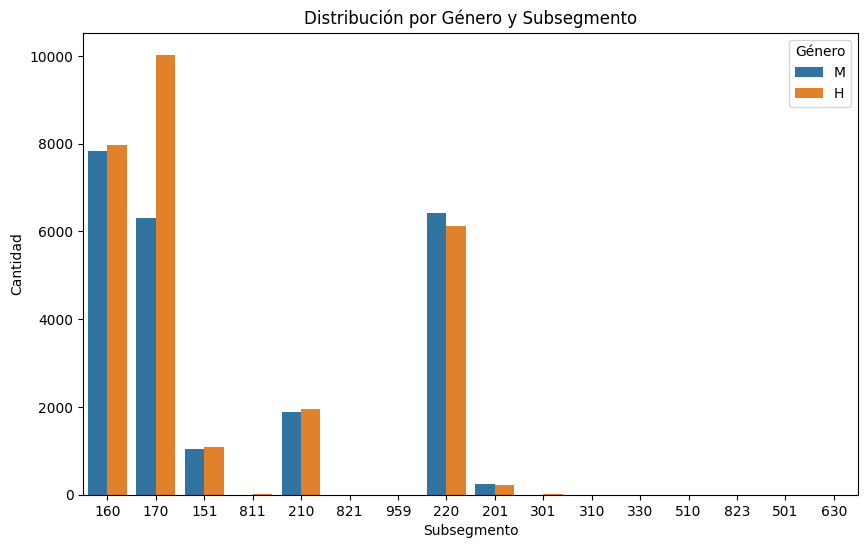

In [5]:
# Filtrar valores nulos en la columna de género y asegurarse de que solo queden "M" y "H"
df_filtered = df[df['Sexo'].isin(['M', 'H'])]

# Gráfico de barras para la distribución por género y subsegmento sin valores nulos en género
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='Subsegmento', hue='Sexo')
plt.title('Distribución por Género y Subsegmento')
plt.xlabel('Subsegmento')
plt.ylabel('Cantidad')
plt.legend(title="Género")
plt.show()




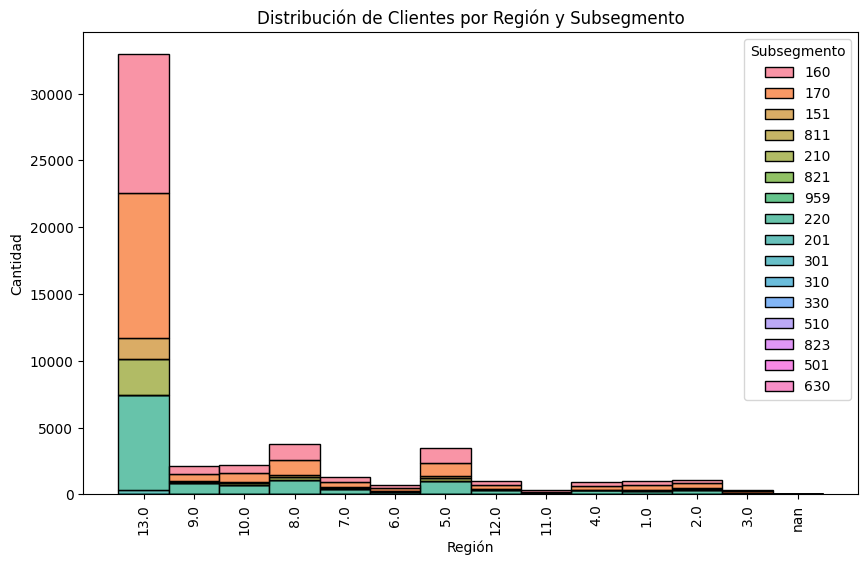

In [6]:
# 2. Gráfico de barras para la distribución por región y subsegmento
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Region', hue='Subsegmento', multiple="stack")
plt.title('Distribución de Clientes por Región y Subsegmento')
plt.xlabel('Región')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show()


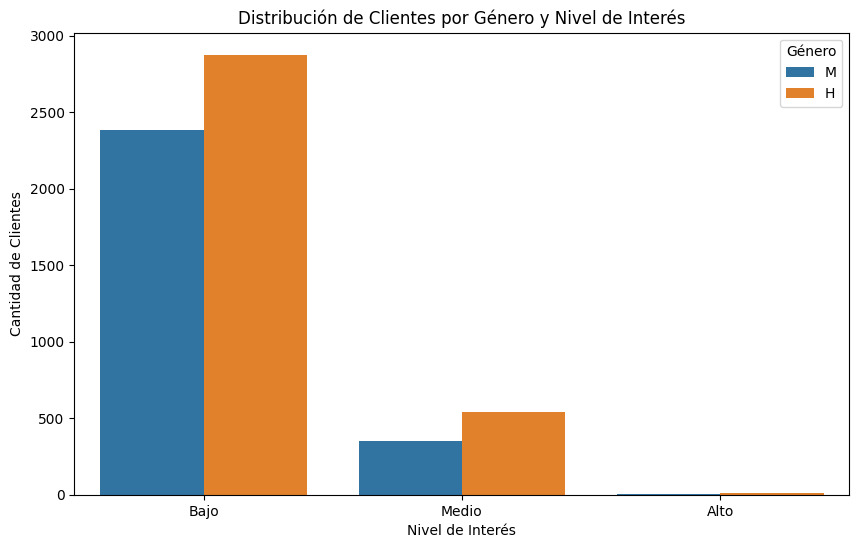

In [8]:
# Crear niveles de interés en productos financieros (con conversión temporal a numérico)
productos_financieros = ['Ctacte', 'Col_T07', 'Hipotecario', 'Debito']

# Convertir temporalmente a numérico, reemplazando valores no válidos con 0
df_temp = df[productos_financieros].apply(pd.to_numeric, errors='coerce').fillna(0)

# Crear la columna de nivel de interés
df['Nivel_Interes'] = pd.cut(df_temp.sum(axis=1), bins=[-1, 2, 5, 10], labels=['Bajo', 'Medio', 'Alto'])

# Filtrar para excluir valores NaN en 'Sexo'
df_filtered = df[df['Sexo'].isin(['M', 'H'])]

# Gráfico de barras agrupado por género y nivel de interés
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='Nivel_Interes', hue='Sexo')
plt.title('Distribución de Clientes por Género y Nivel de Interés')
plt.xlabel('Nivel de Interés')
plt.ylabel('Cantidad de Clientes')
plt.legend(title="Género")
plt.show()



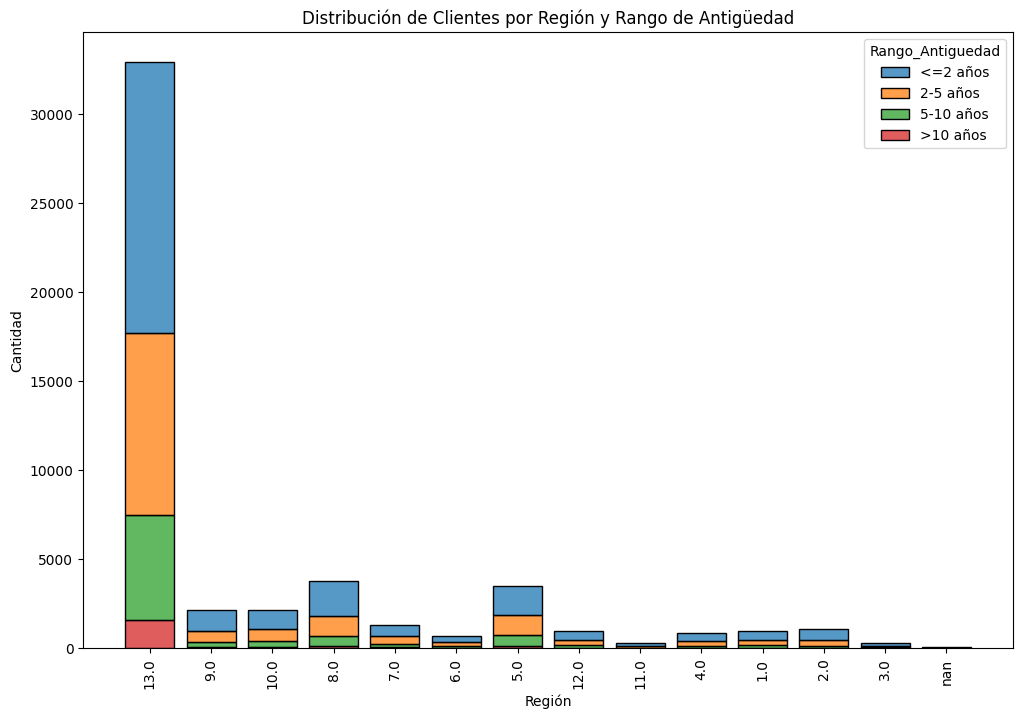

In [11]:
# Asegurar que la columna 'Antiguedad' sea numérica, reemplazando valores no válidos con 0
df['Antiguedad'] = pd.to_numeric(df['Antiguedad'], errors='coerce').fillna(0)

# Categorizar antigüedad en rangos
df['Rango_Antiguedad'] = pd.cut(df['Antiguedad'], bins=[-1, 24, 60, 120, df['Antiguedad'].max()],
                                labels=['<=2 años', '2-5 años', '5-10 años', '>10 años'])

# Gráfico de barras apilado por región y rango de antigüedad
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Region', hue='Rango_Antiguedad', multiple='stack', shrink=0.8)
plt.title('Distribución de Clientes por Región y Rango de Antigüedad')
plt.xlabel('Región')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show()


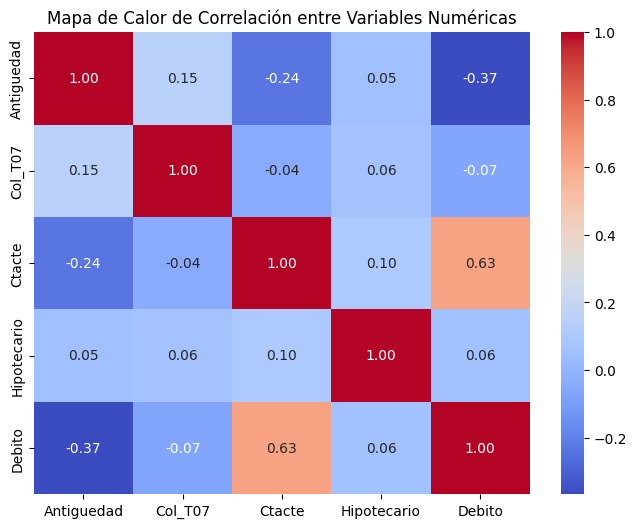

In [14]:
# 3. Mapa de calor de correlación
variables_numericas = ['Antiguedad', 'Col_T07', 'Ctacte', 'Hipotecario', 'Debito']
correlation_matrix = df[variables_numericas].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.show()

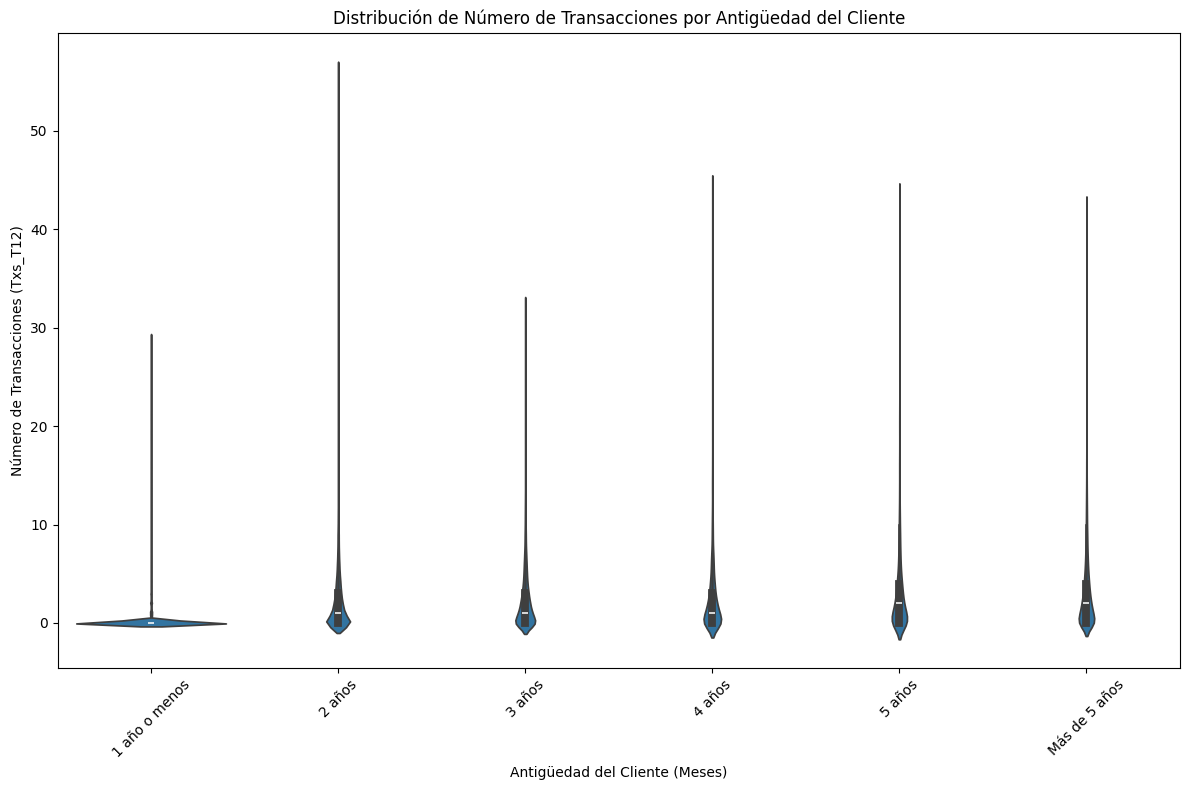

In [29]:
# Crear una columna temporal para 'Antigüedad' sin modificar el dataset original
df_cleaned_temp = df_cleaned.copy()  # Copiar el dataframe original para no modificarlo

# Categorizamos la columna 'Antigüedad' en rangos temporales, solo en esta copia
df_cleaned_temp['Antiguedad_Categorized'] = pd.cut(df_cleaned_temp['Antiguedad'], 
                                                   bins=[-np.inf, 12, 24, 36, 48, 60, np.inf], 
                                                   labels=['1 año o menos', '2 años', '3 años', '4 años', '5 años', 'Más de 5 años'])

# Reemplazar valores negativos en 'Txs_T12' con 0 solo en la copia temporal
df_cleaned_temp['Txs_T12'] = df_cleaned_temp['Txs_T12'].apply(lambda x: max(x, 0))

# Crear el gráfico de violín para analizar la distribución de transacciones por antigüedad
plt.figure(figsize=(12, 8))  # Definir el tamaño de la figura

# Crear el gráfico de violín con la columna temporal 'Antiguedad_Categorized'
sns.violinplot(x='Antiguedad_Categorized', y='Txs_T12', data=df_cleaned_temp)

# Personalizar el gráfico
plt.title('Distribución de Número de Transacciones por Antigüedad del Cliente')
plt.xlabel('Antigüedad del Cliente (Meses)')
plt.ylabel('Número de Transacciones (Txs_T12)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X si es necesario

# Mostrar el gráfico
plt.tight_layout()
plt.show()


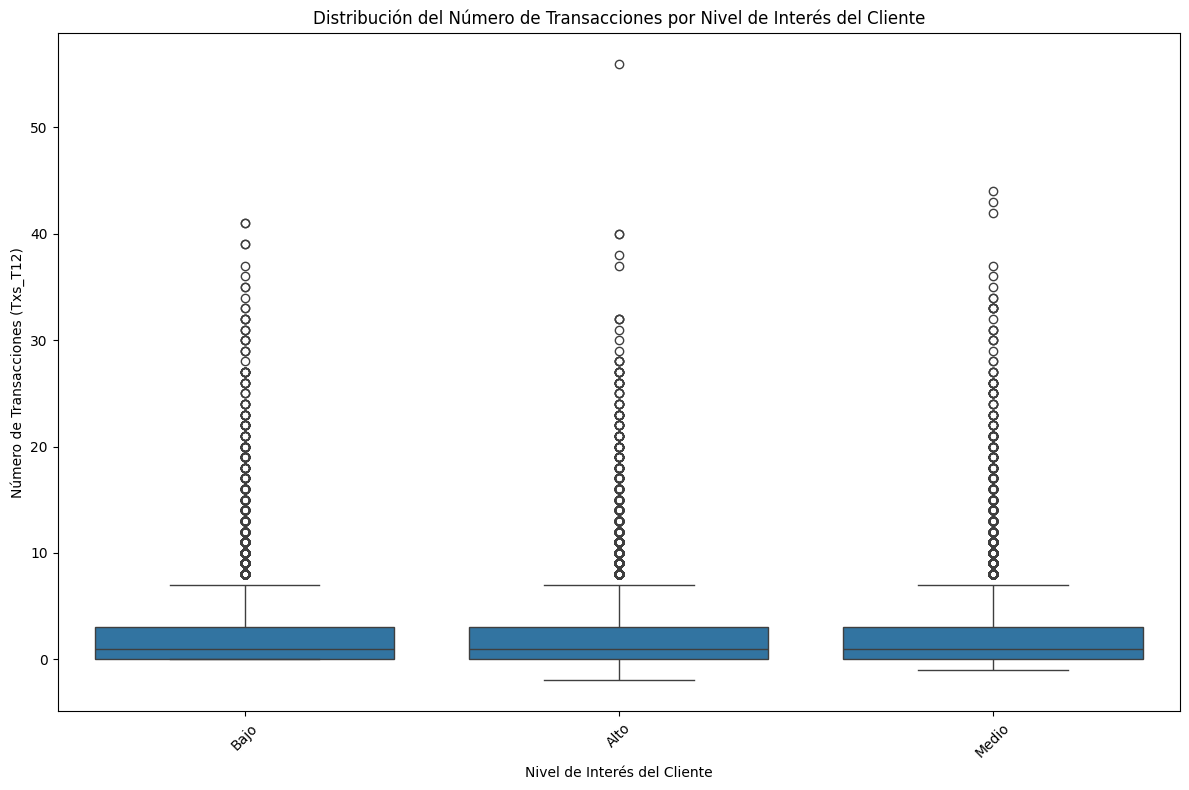

In [32]:
# Crear una copia temporal del dataset para no modificar el original
df_cleaned_temp = df_cleaned.copy()  # Copiar el dataframe original

# Crear el gráfico de boxplot para analizar el número de transacciones por nivel de interés
plt.figure(figsize=(12, 8))  # Definir el tamaño de la figura

# Crear el gráfico de boxplot con 'NivelInteres' en el eje X y 'Txs_T12' en el eje Y
sns.boxplot(x='NivelInteres', y='Txs_T12', data=df_cleaned_temp)

# Personalizar el gráfico
plt.title('Distribución del Número de Transacciones por Nivel de Interés del Cliente')
plt.xlabel('Nivel de Interés del Cliente')
plt.ylabel('Número de Transacciones (Txs_T12)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X si es necesario

# Mostrar el gráfico
plt.tight_layout()
plt.show()
